
# Avances del proyecto en la detección de Exoplanetas

**En está sección encontramos vamos a limpiar la base de datos de valores nulos.Con ello podemos hacer interpretaciones más adecuadas de los datos.**



Página de dónde proviene la base de datos:

* https://exoplanetarchive.ipac.caltech.edu/ 

* https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

* https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

**Modelos Supervisados utilizados:**

* Modelo supervisado de árbol de decisión.

* Modelo supervisado de KNN (K-vecinos cercanos)

Página de información de árbol de decisiones https://scikit-learn.org/stable/modules/tree.html ó https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

Página de infromación sobre KNN https://scikit-learn.org/stable/modules/neighbors.html ó https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/

* kepid:          KepID
* kepoi_name:     KOI Name
* koi_disposition: Exoplanet Archive Disposition
* koi_pdisposition: Disposition Using Kepler Data
* koi_score:      Disposition Score
* koi_fpflag_nt:  Not Transit-Like False Positive Flag
* koi_fpflag_ss:  Stellar Eclipse False Positive Flag
* koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
* koi_period:     Orbital Period [days]
* koi_period_err1: Orbital Period Upper Unc. [days]
* koi_period_err2: Orbital Period Lower Unc. [days]
* koi_time0bk:    Transit Epoch [BKJD]
* koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]
* koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]
* koi_impact:     Impact Parameter
* koi_impact_err1: Impact Parameter Upper Unc.
* koi_impact_err2: Impact Parameter Lower Unc.
* koi_duration:   Transit Duration [hrs]
* koi_duration_err1: Transit Duration Upper Unc. [hrs]
* koi_duration_err2: Transit Duration Lower Unc. [hrs]
* koi_depth:      Transit Depth [ppm]
*  koi_depth_err1: Transit Depth Upper Unc. [ppm]
*  koi_depth_err2: Transit Depth Lower Unc. [ppm]
*  koi_prad:       Planetary Radius [Earth radii]
*  koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]
*  koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]
*  koi_teq:   Equilibrium Temperature [K]
*  koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]
*  koi_teq_err1:   Equilibrium Temperature Lower Unc. [K]
*  koi_insol:      Insolation Flux [Earth flux]
*  koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]
*  koi_insol_err1: Insolation Flux Lower Unc. [Earth flux]
*  koi_model_snr:  Transit Signal-to-Noise
*  koi_tce_plnt_num: TCE Planet Number
*  koi_tce_delivname: TCE Delivery
*  koi_steff:      Stellar Effective Temperature [K]
*  koi_steff_err1: Stellar Effective Temperature Upper Unc. [K] 
*  koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]
*  koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]  
*  koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
* koi_srad:       Stellar Radius [Solar radii]
*  koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii] 
*   koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]
*  dec:            Dec [decimal degrees]
*   koi_kepmag:     Kepler-band [mag]




Palabras claves que se desaroolan en la librerias:

* .head() : Muestra las primeras filas por defecto en pandas. 

* read_csv(): Es para poder cargar el archivo. 

* .drop(): Se utiliza para poder eliminar filas y columnas en un dataframe, indicamos "axis = 1" para eliminar columnas, y "axis = 2" para eliminar filas. Utilizamos "inplace" para eliminar por completo. 

* .transpose(): Para poder hacer cambios del dataframe presentados de columnas a filas. 

* .fillna() : Se utiliza para rellenar los valores faltantes, como por ejemplo los NaN. Inplace = True asegura que se guarden los cambios en el dataframe original. Es decir:

-  df["column1"] =df.fillna(values = "Persona", axis = 1, inplace = Fasle)


* .copy() : Generamos una copia en el dataframe. 

* .query() Con está función de pandas se utiliza mediante expresiones booleanas, dataframe.query("Expresión Booleana")

* .unique(): Es una función que te da información del dataframe.

* .get_dummies(): Es una función que toma una columna, y puede convertirar en valores categoría de tipo binario como (0,1)

In [94]:
#Importar las librerias que se requieren para el analísis de nuestro archivos. 
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("/content/exoplanetas2023.csv")

In [8]:
#Visualización de la base de datos. 

df.head(5)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,Kepler-Noname,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,Kepler-Noname,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [9]:
#Para borrar algo en las columnas que no necesitamos con poner la siguiente instrucción.

df.drop(labels =["kepoi_name" , "kepid"], axis = 1, inplace = True)

In [11]:
df.drop(labels = "kepler_name", axis = 1, inplace = True)

In [16]:
df.head(5).transpose()

,0,1,2,3,4
koi_disposition,CONFIRMED,CONFIRMED,CANDIDATE,FALSE POSITIVE,CONFIRMED
koi_pdisposition,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE,CANDIDATE
koi_score,1.0,0.969,0.0,0.0,1.0
koi_fpflag_nt,0,0,0,0,0
koi_fpflag_ss,0,0,0,1,0
koi_fpflag_co,0,0,0,0,0
koi_fpflag_ec,0,0,0,0,0
koi_period,9.488036,54.418383,19.89914,1.736952,2.525592
koi_period_err1,0.000028,0.000248,0.000015,0.0,0.000004
koi_period_err2,-0.000028,-0.000248,-0.000015,-0.0,-0.000004


In [19]:
#df.drop( labels = ["koi_teq_err1", "koi_teq_err2"], axis = 1, inplace = True) Se elimnaron estás columnas desde la base de datos de Excel.

In [ ]:
#Tenemos unas columnas que son requeridas en poder rellenar de manera adecuada.
#X["koi_disposition"].value_counts()

FALSE POSITIVE    4839
CONFIRMED         2672
CANDIDATE         2053
Name: koi_disposition, dtype: int64

In [75]:
#Función de paramétros para dataframe.  

def procesos_dataframe(df):
  
  
  #Generamos una copia en el dataframe

  df = df.copy()
  
  #Eliminamos una columna. 

  df = df.drop(labels ="koi_pdisposition", axis = 1)

  #Eliminar de la columna los falsos positivos

  falsos_positivos_filas = df.query("koi_disposition == 'FALSE POSITIVE'").index
  
  df = df.drop(falsos_positivos_filas, axis = 0).reset_index(drop = True)

  #Eliminar o convertir todos los valores a nulos.
  
  df["koi_tce_delivname"] = df["koi_tce_delivname"].fillna(df["koi_tce_delivname"].mode()[0])

  #Cambiar los valores: koi_tce_delivname  4725 non-null   object

  #X["koi_tce_delivname"].umique()

  Delivenames = pd.get_dummies(df['koi_tce_delivname'], prefix= "Nuevo")

  df = pd.concat([df, Delivenames], axis = 1)

  df = df.drop("koi_tce_delivname", axis = 1)

  #Tomar todos los valores que nos dan true

  #X.columns[X.isna().sum() >0]

  for columns in df.columns[df.isna().sum() > 0]:

    df[columns] = df[columns].fillna(df[columns].mean())

  return df

In [76]:
X = procesos_dataframe(df)

In [24]:
#Checamos si no existen valores nulos
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4725 entries, 0 to 4724
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    4725 non-null   object 
 1   koi_score          4108 non-null   float64
 2   koi_fpflag_nt      4725 non-null   int64  
 3   koi_fpflag_ss      4725 non-null   int64  
 4   koi_fpflag_co      4725 non-null   int64  
 5   koi_fpflag_ec      4725 non-null   int64  
 6   koi_period         4725 non-null   float64
 7   koi_period_err1    4604 non-null   float64
 8   koi_period_err2    4604 non-null   float64
 9   koi_time0bk        4725 non-null   float64
 10  koi_time0bk_err1   4604 non-null   float64
 11  koi_time0bk_err2   4604 non-null   float64
 12  koi_impact         4619 non-null   float64
 13  koi_impact_err1    4604 non-null   float64
 14  koi_impact_err2    4604 non-null   float64
 15  koi_duration       4725 non-null   float64
 16  koi_duration_err1  4604 

In [63]:
X.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,Nuevo_q1_q16_tce,Nuevo_q1_q17_dr24_tce,Nuevo_q1_q17_dr25_tce
0,CONFIRMED,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.538750,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,0,1
1,CONFIRMED,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.513840,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,0,1
2,CANDIDATE,0.000,0,0,0,0,19.899140,0.000015,-0.000015,175.850252,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
3,CONFIRMED,1.000,0,0,0,0,2.525592,0.000004,-0.000004,171.595550,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,0,1
4,CONFIRMED,1.000,0,0,0,0,11.094321,0.000020,-0.000020,171.201160,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,0,1


In [ ]:
X["koi_disposition"].value_counts() #Finalmente solamente tenemos valores de 1 y 0. 

CONFIRMED    2672
CANDIDATE    2053
Name: koi_disposition, dtype: int64

# Últimos paso para poder limpiar los datos



-Este método se utilizar para verificar si un método es NaN (Not Number) o nulo. Se utiliza para averiguar si hay valores restantes o no. 
-Los valores True corresponden valores nulos. 
-Los valores False corresponden a valores no nulos. 

In [28]:
X.isna().head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
koi_disposition,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_score,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_fpflag_nt,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_fpflag_ss,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_fpflag_co,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_fpflag_ec,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_period,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_period_err1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_period_err2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
koi_time0bk,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
X.isna().sum() #Con esto la parte de koi_tce_delivname es cero. No es NaN

koi_disposition            0
koi_score                617
koi_fpflag_nt              0
koi_fpflag_ss              0
koi_fpflag_co              0
koi_fpflag_ec              0
koi_period                 0
koi_period_err1          121
koi_period_err2          121
koi_time0bk                0
koi_time0bk_err1         121
koi_time0bk_err2         121
koi_impact               106
koi_impact_err1          121
koi_impact_err2          121
koi_duration               0
koi_duration_err1        121
koi_duration_err2        121
koi_depth                106
koi_depth_err1           121
koi_depth_err2           121
koi_prad                 106
koi_prad_err1            106
koi_prad_err2            106
koi_teq                  106
koi_insol                103
koi_insol_err1           103
koi_insol_err2           103
koi_model_snr            106
koi_tce_plnt_num          71
koi_steff                106
koi_steff_err1           112
koi_steff_err2           125
koi_slogg                106
koi_slogg_err1

# Cambiar valores de "Koi_tce_delivname"

In [49]:
#Averiguamos se comporta los valores de la fila Koi_tce_delivname

X["koi_tce_delivname"].unique() 

array(['q1_q17_dr25_tce', 'q1_q17_dr24_tce', 'q1_q16_tce'], dtype=object)

In [54]:
pd.get_dummies(X["koi_tce_delivname"], prefix = "Nuevo").head(5) #Mostrar solamente los valores que se pueden ir intercamviando. #Tenemos que meter esta table en nuetro DataFrame

,Nuevo_q1_q16_tce,Nuevo_q1_q17_dr24_tce,Nuevo_q1_q17_dr25_tce
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


# Verificando los valores que tienen True o False


In [67]:
X.columns[X.isna().mean() > 0]

Index(['koi_score', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2'],
      dtype='object')

In [68]:
X.isna().mean() > 0

koi_disposition          False
koi_score                 True
koi_fpflag_nt            False
koi_fpflag_ss            False
koi_fpflag_co            False
koi_fpflag_ec            False
koi_period               False
koi_period_err1           True
koi_period_err2           True
koi_time0bk              False
koi_time0bk_err1          True
koi_time0bk_err2          True
koi_impact                True
koi_impact_err1           True
koi_impact_err2           True
koi_duration             False
koi_duration_err1         True
koi_duration_err2         True
koi_depth                 True
koi_depth_err1            True
koi_depth_err2            True
koi_prad                  True
koi_prad_err1             True
koi_prad_err2             True
koi_teq                   True
koi_insol                 True
koi_insol_err1            True
koi_insol_err2            True
koi_model_snr             True
koi_tce_plnt_num          True
koi_steff                 True
koi_steff_err1            True
koi_stef

# Entranmiento de los datos 

In [178]:
#Visualización de los datos utilizando librerias

import seaborn as sns

import matplotlib.pyplot as plt

#Entrenamiento de los datos 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder #Cambiar las clases númericas.

#Arbol de decisiones

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

#KNN modelo supervisado con métrica de manhattan 

from sklearn.neighbors import KNeighborsClassifier




In [136]:
#Cambiar los valores a variables numericas 

enconder = LabelEncoder()

X["koi_disposition"]= enconder.fit_transform(X["koi_disposition"])

In [138]:
X["koi_disposition"].unique()

array([1, 0])

In [139]:
Y = X["koi_disposition"] #Objects

In [140]:
X_1 = X.drop(labels = "koi_disposition", axis = 1) #Values or vector.

In [141]:
X_1.head(5)

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,Nuevo_q1_q16_tce,Nuevo_q1_q17_dr24_tce,Nuevo_q1_q17_dr25_tce
0,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.538750,0.002160,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,0,1
1,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.513840,0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,0,1
2,0.000,0,0,0,0,19.899140,0.000015,-0.000015,175.850252,0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
3,1.000,0,0,0,0,2.525592,0.000004,-0.000004,171.595550,0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,0,1
4,1.000,0,0,0,0,11.094321,0.000020,-0.000020,171.201160,0.001410,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,0,1


In [122]:
#sns.pairplot(X, hue = "koi_disposition") #Graficar solo para ver como se ve.

In [ ]:
plt.title("Temperature Upper vs Stellear Effective Upper", loc = "left")
plt.xlabel("Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]")
plt.ylabel("Stellar Effective Temperature Upper Unc. [K]")
plt.scatter(X_1["koi_slogg_err1"],X_1["koi_steff_err1"])
plt.grid()

In [171]:
#Entrenamiento de los datos

x_train, x_test, y_train, y_test = train_test_split(X_1, Y, test_size = 0.3, stratify =Y)

In [172]:
np.bincount(y_train)

array([1437, 1870])

In [173]:
np.bincount(y_test)

array([616, 802])

# Árbol de decisiones

In [174]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth=5)


In [175]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.49375, 0.9166666666666666, 'x[27] <= 13.25\nentropy = 0.988\nsamples = 3307\nvalue = [1437, 1870]'),
 Text(0.25416666666666665, 0.75, 'x[27] <= 11.35\nentropy = 0.544\nsamples = 1030\nvalue = [901, 129]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[0] <= 0.987\nentropy = 0.336\nsamples = 741\nvalue = [695, 46]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[11] <= 0.644\nentropy = 0.171\nsamples = 589\nvalue = [574, 15]'),
 Text(0.03333333333333333, 0.25, 'x[5] <= 12.423\nentropy = 0.085\nsamples = 473\nvalue = [468, 5]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.196\nsamples = 165\nvalue = [160, 5]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.0\nsamples = 308\nvalue = [308, 0]'),
 Text(0.1, 0.25, 'x[33] <= 0.027\nentropy = 0.424\nsamples = 116\nvalue = [106, 10]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.11666666666666667, 0.08333333333333333, 'entropy = 0.367\nsamples = 114\nva

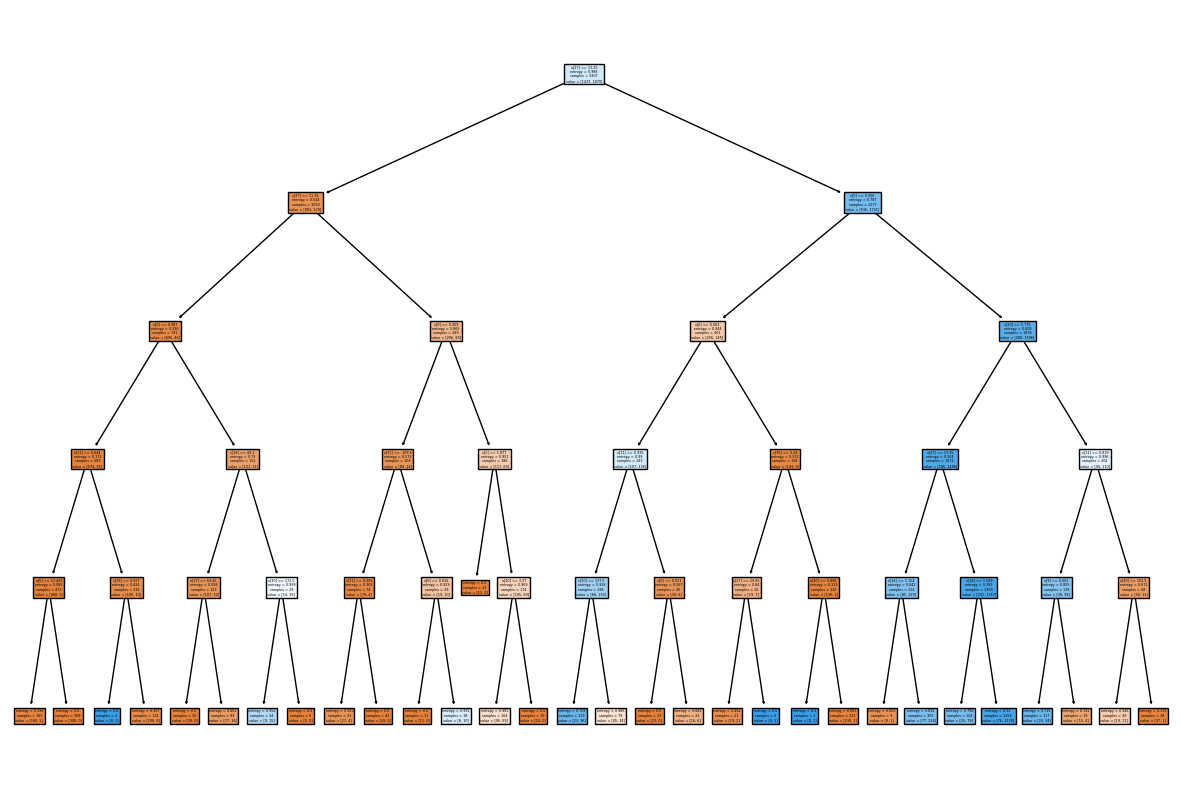

In [176]:
plt.figure(figsize= (15,10))
plot_tree(tree,  filled = True)

In [177]:
#Matrix de resultados:

yhat = tree.predict(x_test) #Que haga una predicción de mis datos de prueba. 
precision = accuracy_score(y_test, yhat)
c_matrx = confusion_matrix(y_test,yhat)

print(f" Los resutlados de nuestro logaritmo de entrenamiento con una profundidad de 5 es {precision*100}")
print(c_matrx)

 Los resutlados de nuestro logaritmo de entrenamiento con una profundidad de 5 es 86.31875881523273
[[496 120]
 [ 74 728]]


# KNN 

In [204]:
# Enlaces de métricas https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

knn = KNeighborsClassifier(n_neighbors=8, metric = "manhattan")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [205]:
yhat = knn.predict(x_test)

P = accuracy_score(y_test, yhat)

M = confusion_matrix(y_test, yhat)

print(f"El valor de precisión de mis datos son los siguientes {P*100}")

print(M)

El valor de precisión de mis datos son los siguientes 77.78561354019746
[[440 176]
 [139 663]]
